##  Определение перспективного тарифа для телеком компании

_____

#### Цель:
Выявить тариф, который приносит больше денег, что бы скорректировать рекламный бюджет компании "Мегалайн".

#### Задачи:
1. Подготовить данные
2. Проанализировать данные
    - Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
3. Проверить гипотезы
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

_____

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyBboxPatch 

In [2]:
users = pd.read_csv()
calls = pd.read_csv()
messages = pd.read_csv(')
internet = pd.read_csv()
tariffs = pd.read_csv()

In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Данные представлены пятью таблицами и имеет разные типы данных.Таблицы связаны столбцом user_id, кроме таблицы tarrifs, которая представляет информацию о тарифах. В таблице internet замечен столбец 'Unnamed: 0', который не несет никакой информации.Так же в таблице users есть пропущенные значения в столбце churn_date, они говорят о том, что тарифом еще пользуются. 

Приведем данные из столбцов с датами к данным типа datetime. 

In [13]:
#Для пользователей
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
#Для звонков
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
#Для сообщений
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
#Для интернет трафика
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

Учтем тот факт, что  «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

In [14]:
calls['duration'] = np.ceil(calls['duration']).astype(int)
internet['mb_used'] = np.ceil(internet['mb_used']).astype(int)

В таблице calls в столбце duration указано время разговора. Значение 0 может означать, что этого разговора не было, пропущенный звонок или ошибка. 

В таблице internet мне неизвестен столбец "Unnamed: 0", его не в описании и он дублирует индекс. Удалим его. 

In [15]:
internet = internet.drop(columns = ['Unnamed: 0'])

#### Вывод:

Была проведена небольшая предобработка данных.
    - Заменены форматы данных в столбцах таблиц с датами на datetime;
    - Учтен факт округления вверх значений минут и мегабайтов;
    - Удален столбец "Unnamed: 0" в таблице "Unnamed: 0".

____

Создадим столбец для каждой таблицы по месяцам.

In [16]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

Создадим сводные таблицы по user_id и месяцам, добавим необходимые значения.

In [17]:
users_calls_for_month = calls.pivot_table(index = ('user_id', 'month'), values = 'duration', aggfunc=('sum',  'count')).reset_index()
users_calls_for_month.columns = ['user_id','months','count_calls', 'duration_calls']

In [18]:
users_messages_for_month = messages.pivot_table(index = ('user_id', 'month'), values = 'id', aggfunc='count').reset_index()
users_messages_for_month.columns = ['user_id','months','count_messages']

In [19]:
users_internet_for_month = internet.pivot_table(index = ('user_id', 'month'), values = 'mb_used', aggfunc='sum').reset_index()
users_internet_for_month.columns = ['user_id','months','mb_used']

Объеденим таблицы

In [20]:
users_all_for_month = pd.merge(users_calls_for_month, users_messages_for_month, on=('user_id', 'months'), how = 'left')

In [21]:
users_all_for_month = pd.merge(users_all_for_month, users_internet_for_month, on=('user_id', 'months'), how = 'left')

Проверим на пустые значения и заменим их на 0, если присутствуют. 

In [22]:
users_all_for_month.isna().sum()

user_id             0
months              0
count_calls         0
duration_calls      0
count_messages    496
mb_used            11
dtype: int64

In [23]:
users_all_for_month[['count_messages','mb_used']] = \
users_all_for_month[['count_messages','mb_used']].fillna(0).astype('int')

Добавим столбец с тарифом к нашей таблице

In [24]:
users_tafiff = users[['user_id','tariff']]
users_tafiff.columns = ['user_id','tariff_name']

In [25]:
users_all_for_month = pd.merge(users_all_for_month, users_tafiff, on=('user_id'), how = 'left')

Для выполнение дальшнейшей функции установим тарифы в index 

In [26]:
tariffs = tariffs.set_index('tariff_name')

In [27]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


In [28]:
users_all_for_month

,user_id,months,count_calls,duration_calls,count_messages,mb_used,tariff_name
0,1000,5,22,159,22,2256,ultra
1,1000,6,43,172,60,23257,ultra
2,1000,7,47,340,75,14016,ultra
3,1000,8,52,408,81,14070,ultra
4,1000,9,58,466,57,14581,ultra
...,...,...,...,...,...,...,...
3169,1498,10,41,247,42,20604,smart
3170,1499,9,9,70,11,1848,smart
3171,1499,10,68,449,48,17809,smart
3172,1499,11,74,612,59,17984,smart


In [29]:
'''Функция вычисляет переплату за звонки, смс интернет'''


def month_payment_calculation(row):

    used_min = row['duration_calls']
    used_message = row['count_messages']
    used_internet = row['mb_used']
    tariff = row['tariff_name']
   
    # достаем наши тарифы
    minutes_lim = tariffs.loc[tariff, 'minutes_included']
    mess_lim = tariffs.loc[tariff, 'messages_included']
    inter_lim = tariffs.loc[tariff, 'mb_per_month_included']
    rub_monthly_fee = tariffs.loc[tariff, 'rub_monthly_fee']
   
    # вычисляем переплату по звонкам
    call_overlimit = max(used_min - minutes_lim, 0)
    call_overpay = call_overlimit * tariffs.loc[tariff, 'rub_per_minute']
    
    # вычисляем переплату за смс
    message_overlimit = max(used_message - mess_lim, 0)
    message_overpay = message_overlimit * tariffs.loc[tariff, 'rub_per_message']
    
    # вычисляем переплату за интернет
    internet_overlimit = max(used_internet - inter_lim, 0)
    internet_overpay = (internet_overlimit / 1024) * tariffs.loc[tariff, 'rub_per_gb']
    
    return call_overpay + message_overpay + internet_overpay + rub_monthly_fee
    

In [30]:
users_all_for_month['payment_month'] = round(users_all_for_month.apply(month_payment_calculation, axis =1),2)

In [31]:
users_all_for_month

,user_id,months,count_calls,duration_calls,count_messages,mb_used,tariff_name,payment_month
0,1000,5,22,159,22,2256,ultra,1950.00
1,1000,6,43,172,60,23257,ultra,1950.00
2,1000,7,47,340,75,14016,ultra,1950.00
3,1000,8,52,408,81,14070,ultra,1950.00
4,1000,9,58,466,57,14581,ultra,1950.00
...,...,...,...,...,...,...,...,...
3169,1498,10,41,247,42,20604,smart,1574.22
3170,1499,9,9,70,11,1848,smart,550.00
3171,1499,10,68,449,48,17809,smart,1028.32
3172,1499,11,74,612,59,17984,smart,1425.50


##### Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Для дальнейших вычислений я бы хотел заменить нулевые значения на пропуски, что бы не смещать наши следующие данные.

In [32]:
users_all_for_month[users_all_for_month[['payment_month','mb_used','count_messages', 'duration_calls']] == 0].count()

user_id             0
months              0
count_calls         0
duration_calls      6
count_messages    496
mb_used            13
tariff_name         0
payment_month       0
dtype: int64

In [33]:
users_all_for_month[['mb_used','count_messages', 'duration_calls']]\
= users_all_for_month[['mb_used','count_messages', 'duration_calls']].replace(0,np.nan)
                        

In [34]:
# Группируем по месяцам
users_all_for_month_mean_per_tariff = \
users_all_for_month.pivot_table(index=('tariff_name','months'), values = ('duration_calls', 'count_messages', 'mb_used'))

In [35]:
users_all_for_month_mean_per_tariff = users_all_for_month_mean_per_tariff.reset_index()

In [36]:
users_all_for_month_mean_per_tariff['months'] = users_all_for_month_mean_per_tariff['months'].astype('object')

In [37]:
#users_all_for_month_mean_per_tariff

In [38]:
# Функция для построения графика средних значений минут, смс, мб
def graf (y):
    ax = users_all_for_month_mean_per_tariff.loc[users_all_for_month_mean_per_tariff['tariff_name']=='ultra']\
    .plot.bar(x= 'months', y =y, label='ultra', grid = True, position = 0, width = 0.3)
    users_all_for_month_mean_per_tariff.loc[users_all_for_month_mean_per_tariff['tariff_name']=='smart']\
    .plot.bar(x= 'months', y =y,ax =ax, label='smart', color='red', grid = True,position = 1, width = 0.3)
    plt.xlabel('Месяц', fontsize=15)
       

Text(0, 0.5, 'Количество мб')

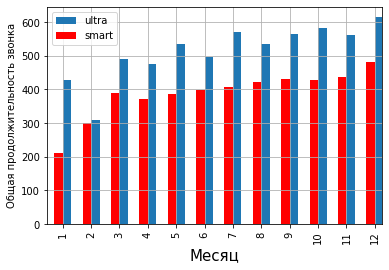

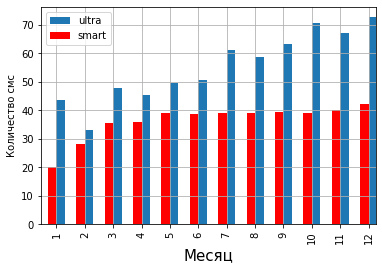

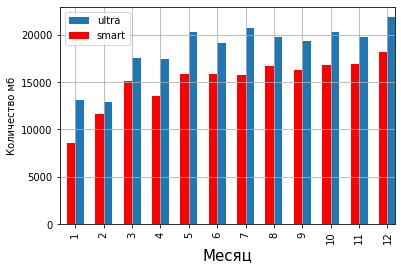

In [39]:
#Графики для продолжительности звонка по месяцам.

graf('duration_calls')
plt.ylabel('Общая продолжительность звонка', fontsize=10)
#Графики для количества смс по месяцам.

graf('count_messages')
plt.ylabel('Количество смс', fontsize=10)
#Графики для количества мб по месяцам.

graf('mb_used')
plt.ylabel('Количество мб', fontsize=10)

Можем заметить рост от января к декабрю по всем показателям. Январь самый "необщительный" месяц в году для тарифа Smart. Есть предположение, что в декабре обычно, особенно перед новым годом, все звонят своим родственникам, что бы под конец года узнать как у них дела и поздравить. На тарифе Ultra зависимость примерно такая же, только вот на первое место, по "необщительности" выходит Февраль. Возможно, пользователи тарифа Ultra знают, что у них много минут, поэтому в январе тратят больше времени на поздравления. А февраль, обычно, морозный месяц, все берегут энергию и попусту не болтают. Что касается "Объемов", то по тарифу Ultra они больше. Люди больше общаются, сидят дольше в интернете. 

###### Посчитаем средние значения, дисперсию и стандартное отклонение по каждой характеристике в зависимости от тарифа

In [40]:
charact = round(users_all_for_month\
.groupby('tariff_name')['duration_calls', 'count_messages', 'mb_used']\
.agg([np.mean, lambda var: np.var(var, ddof=1), lambda std: np.std(std, ddof=1)])).reset_index()

In [41]:
charact.columns = ['tariff_name','calls_mean',
            'calls_var',
            'calls_std',
            'messages_mean',
            'messages_var',
            'messages_std',
            'mb_used_mean',
            'mb_used_var',
            'mb_used_std']

In [42]:
charact

,tariff_name,calls_mean,calls_var,calls_std,messages_mean,messages_var,messages_std,mb_used_mean,mb_used_var,mb_used_std
0,smart,419.0,35718.0,189.0,39.0,719.0,27.0,16245.0,34407617.0,5866.0
1,ultra,548.0,93338.0,306.0,61.0,2000.0,45.0,19709.0,99443832.0,9972.0


В таблице charact представлены средние значения, дисперсия и стандартное отклонение для каждого тарифа и его элемента. Из этих данных мы можем определить верхнюю и нижнюю границы, которые будут включать 99% всех значений. Они равняются, как средняя +/- 3 стандартных отклонения. 

Построим графики распределения, будем использовать метод kde.

In [43]:
def graff_d (column):
    ax = users_all_for_month.loc[users_all_for_month['tariff_name']== 'ultra'][column]\
    .plot(kind='kde', label= 'ultra', grid = True, color = 'green')
    users_all_for_month.loc[users_all_for_month['tariff_name']== 'smart'][column]\
    .plot(kind='kde', label= 'smart', grid = True, color = 'red', ax = ax)
    plt.legend(fontsize=14, loc= 5)
    

Text(49632, 3e-05, '3$\\sigma ultra$')

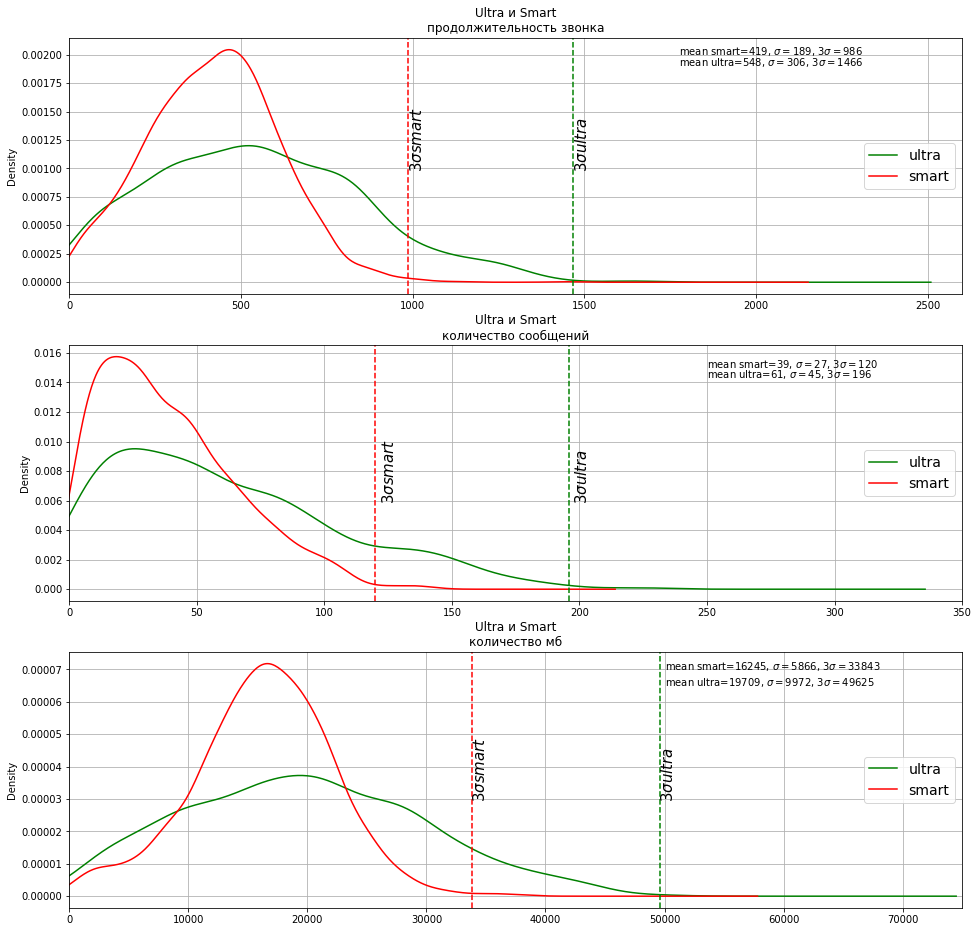

In [60]:
plt.figure(figsize=(16,16))

plt.subplot(3,1,1)
graff_d ('duration_calls')
plt.xlim(0,2600)
plt.title('Ultra и Smart\nпродолжительность звонка')
plt.text(1775, .002, r'mean smart=419, $\sigma=189$, 3$\sigma=986$')
plt.text(1775, .0019, r'mean ultra=548, $\sigma=306$, 3$\sigma=1466$')
plt.axvline(x=986, color = 'red', ls = '--')
plt.axvline(x=1466, color = 'green', ls = '--')
plt.text(990, 0.001, '3$\sigma smart$', fontsize=15,  rotation='vertical')
plt.text(1470, 0.001, '3$\sigma ultra$', fontsize=15,  rotation='vertical')

plt.subplot(3,1,2)
graff_d ('count_messages')
plt.title('Ultra и Smart\nколичество сообщений')
plt.xlim(0,350)
plt.text(250, .015, r'mean smart=39, $\sigma=27$, 3$\sigma=120$')
plt.text(250, .0143, r'mean ultra=61, $\sigma=45$, 3$\sigma=196$')
plt.axvline(x=120, color = 'red', ls = '--')
plt.axvline(x=196, color = 'green', ls = '--')
plt.text(122, 0.006, '3$\sigma smart$', fontsize=15,  rotation='vertical')
plt.text(198, 0.006, '3$\sigma ultra$', fontsize=15,  rotation='vertical')

plt.subplot(3,1,3)
graff_d ('mb_used')
plt.xlim(0,75000)
plt.title('Ultra и Smart\nколичество мб')
plt.text(50000, .00007, r'mean smart=16245, $\sigma=5866$, 3$\sigma=33843$')
plt.text(50000, .000065, r'mean ultra=19709, $\sigma=9972$, 3$\sigma=49625$')
plt.axvline(x=33843, color = 'red', ls = '--')
plt.axvline(x=49625, color = 'green', ls = '--')
plt.text(33850, 0.00003, '3$\sigma smart$', fontsize=15,  rotation='vertical')
plt.text(49632, 0.00003, '3$\sigma ultra$', fontsize=15,  rotation='vertical')

Можем заметить, как все наши распределения скошены в правую сторону, это говорит о положительной скошености и дополнительных значениях, которые оттягивают наше распределение. Так же, медиана будет меньше средней, проверим это утверждение. 
- На графике указана средняя величина, стандартное отклонение и 3 стандартных отклонения, что бы показать границе, куда попадают 99% наших значений. 
- Так же я обрезал график по 0, так как не может быть отрицательных значений. 

In [45]:
users_all_for_month\
.groupby('tariff_name')['duration_calls', 'count_messages', 'mb_used'].describe()

duration_calls                                                    \
                     count        mean         std  min    25%    50%    75%   
tariff_name                                                                    
smart               2221.0  419.440342  188.992403  2.0  285.0  423.0  546.0   
ultra                947.0  547.755016  305.513385  1.0  311.0  529.0  758.0   

                    count_messages             ...              mb_used  \
                max          count       mean  ...   75%    max   count   
tariff_name                                    ...                        
smart        1435.0         1916.0  38.747390  ...  55.0  143.0  2221.0   
ultra        1673.0          762.0  61.195538  ...  88.0  224.0   940.0   

                                                                           \
                     mean          std    min      25%      50%       75%   
tariff_name                                                                 
smart        16244.782080  5865.800623  202.0  12682.0  16531.0  20080.00   
ultra        19708.508511  9972.152826  366.0  11917.0  19451.5  26904.75   

                      
                 max  
tariff_name           
smart        38610.0  
ultra        49789.0  

[2 rows x 24 columns]

Интересно, что медиана больше и очень близка к средней в тарифе Smart, где распределены мегабайты и продолжительность телефонного звонка, можем сказать, что здесь представлено распределение без особой скошенности. 

###### Проверка гипотез

#### Гипотеза №1

##### H0:
Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается
##### H1
Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [46]:
sample_smart_payment = users_all_for_month.query('tariff_name == "smart"')['payment_month']
sample_ultra_payment = users_all_for_month.query('tariff_name == "ultra"')['payment_month']
alpha = .05

In [47]:
print('Средняя выручка для тарифа smart: ',round(sample_smart_payment.mean()))
print('Средняя выручка для тарифа ultra: ',round(sample_ultra_payment.mean()))

Средняя выручка для тарифа smart:  1234
Средняя выручка для тарифа ultra:  2061


In [48]:
results_payment = st.ttest_ind(sample_smart_payment, sample_ultra_payment)

In [49]:
print('p-значение:', results_payment.pvalue)

p-значение: 1.4081556659852518e-184


In [50]:
if (results_payment.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


##### Вывод:
Полученное значение p-value говорит о том, что можно сделать вывод о значимом различии между средними выручками пользователей у разных тарифов. 

#### Гипотеза №2 

##### H0
Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
##### H1
Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

_____

Для начала объеденим таблицы для получения списка городов.

In [51]:
users_all_for_month_users = users_all_for_month.merge(users, on='user_id', how='left')

In [52]:
#Проверяю уникальность городов, что бы не было повторов.
users_all_for_month_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [53]:
sample_smart_moscow = users_all_for_month_users.query('city == "Москва"')['payment_month']
sample_ultra_othercity = users_all_for_month_users.query('city != "Москва"')['payment_month']
alpha_2 = .05

In [54]:
print('Средняя выручка для Москвы: ',round(sample_smart_moscow.mean()))
print('Средняя выручка для других городов: ',round(sample_ultra_othercity.mean()))

Средняя выручка для Москвы:  1507
Средняя выручка для других городов:  1476


In [55]:
results_city = st.ttest_ind(sample_smart_moscow, sample_ultra_othercity)

In [56]:
print('p-значение:', results_city.pvalue)

p-значение: 0.393324227019597


In [57]:
if (results_city.pvalue < alpha_2):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что можем подтвердить нашу нулевую гипотезу, и говорить о том, что средняя выручка пользователей из Москвы в целом не отличается от средней выручки пользователей из других регионов.

Нулевая гипотеза устанавливалась из того, что H₀ всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти.
Использовался критерий о равенстве средних двух совокупностей, нам необходимо было сравнить,как в первой гипотезе о тарифах, так и во второй о городах, различаются ли их средние. 

#### Вывод:
Целью нашего исследования было выявить тариф, который приносит больше денег, что бы скорректировать рекламный бюджет компании "Мегалайн". 

- Была проведена работа по предобработке данных, исправлены типы данных в столбцах с датами. Составлены необходимые таблицы для дальнейшего анализа и проверке гипотез.

- Выявлено:
    1. тариф ultra приносит в среднем на пользователя больше денег, чем тариф smart.
    2. Не обнаружилось значительной разницы между выручками Москвы и других городов. 
    3. Так же было отмечено, что в начале нового года, первые два месяца, люди общаются меньше, пики приходятся на декабрь. 
 
Предлагаю скорректировать рекламный бюджет в сторону тарифа ultra. А так же учесть факт о необщительности клиентов в первые месяцы года и уменьшить расходы на рекламу, в первые месяца года. 
